In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from itertools import cycle
from sklearn.metrics import adjusted_rand_score,silhouette_score,adjusted_mutual_info_score

#Estimated number of clusters, Adjusted Rand Index, Adjusted
#Mutual Information, Silhouette Coefficient.

In [294]:
from sklearn.datasets import make_blobs
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [-2.0, -2.0]]
clusters_std = [0.8, 0.4]# я трохи зменшив показник відхилення, бо інакше точки "збивались в одну купу".
X, y = make_blobs (n_samples=[n_samples_1 , n_samples_2] ,
centers=centers,
cluster_std=clusters_std ,
random_state=0, shuffle=False )

print(X.shape,y.shape)

(1100, 2) (1100,)


In [295]:
from sklearn.datasets import load_iris
a = load_iris()
data = pd.DataFrame(a.data)
target = np.array(a.target).reshape((1,150))

# Графічне представлення данних 
### _для варіанту "а"_
Можемо помітити, що є 2 виражені

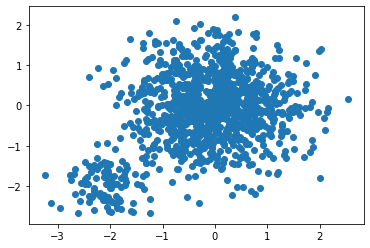

In [296]:
plt.scatter(X[:,0],X[:,1])
plt.show()

### _для варіанту "б"_
Можемо побачити що Іриси мають на всіх малюнках 2-3 виражені класи

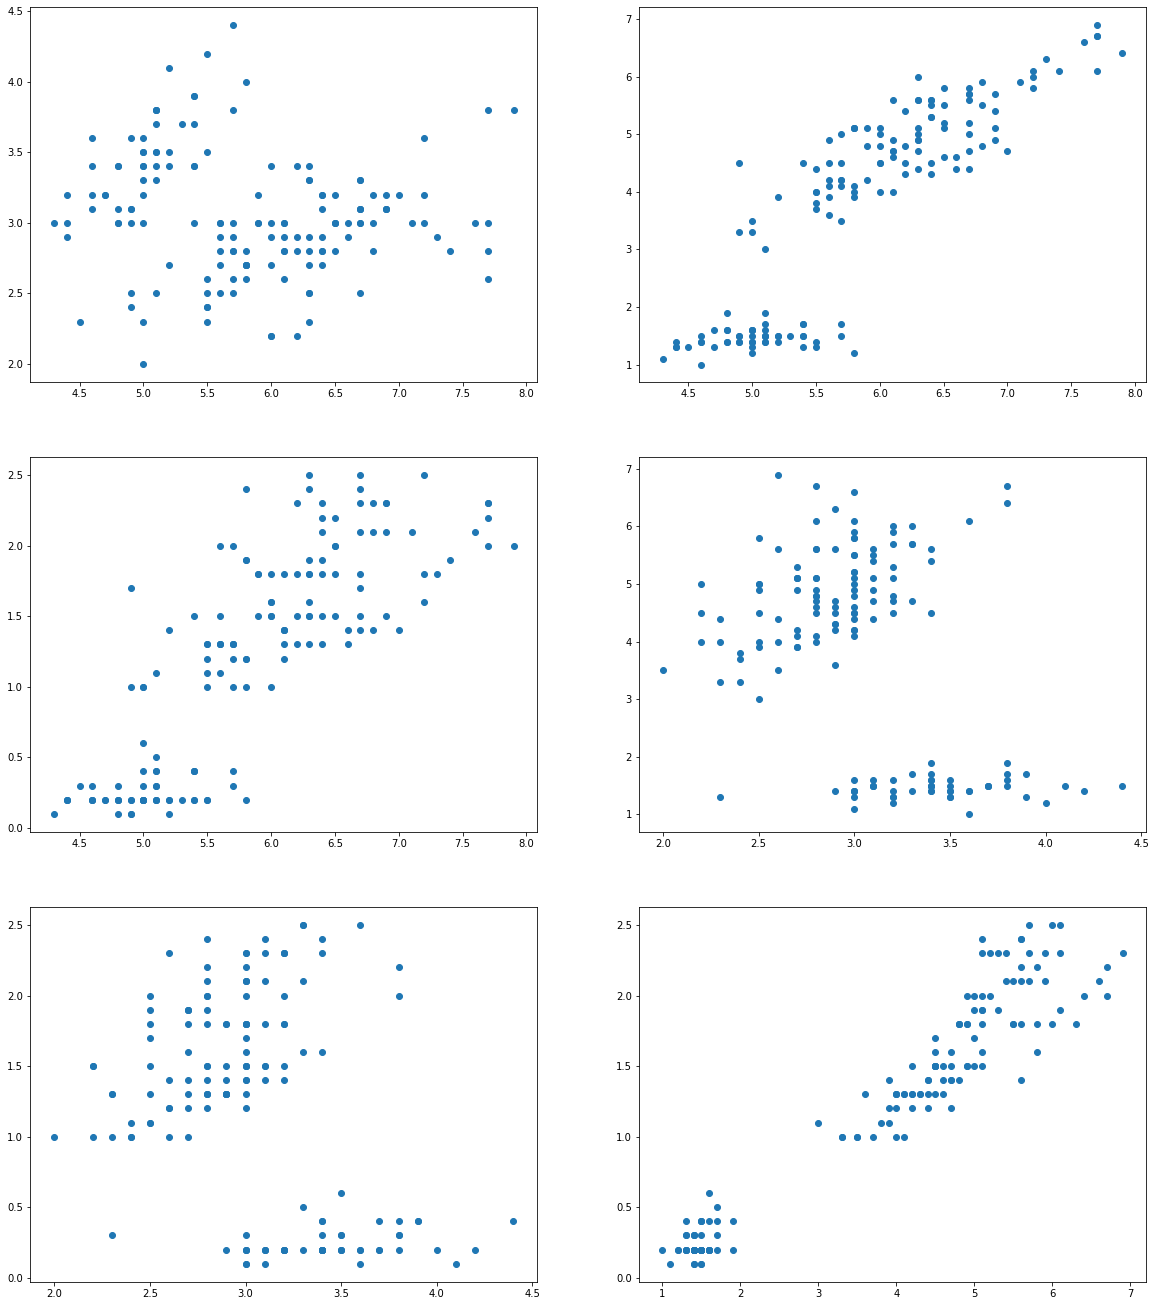

In [297]:
fig = plt.figure(figsize=(20,40))
k = 1
for i in range(1,5):
    for j in range(1,5):
        if i != j and j>i:
            plt.subplot(5,2,k)
            plt.scatter(data[i-1],data[j-1])
            k+=1

# Створення моделі та візуалізація
### _для варіанту "а"_

In [298]:
def showMeanShifta(bw, bs,X, y):
    ms = MeanShift(bandwidth=bw, bin_seeding = bs).fit(X)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    lbs = labels.reshape((1,1100))[0]
    print("Estimated number of clusters, : %d" % n_clusters_)    
    print("Adjusted Rand Index", adjusted_rand_score(y,lbs))
    print("Adjusted Mutual Information", adjusted_mutual_info_score(y, lbs, average_method='arithmetic'))
    if lbs.sum() != 0:
        print("Silhouette Coefficient", silhouette_score(X,lbs))
    n = int(np.exp(2/bw))
    colors = ['r','g','b','c','k','y','m']*n
    fig = plt.figure(figsize = (20,10))
    plt.subplot(1,1,1)
    for i in range(len(X[:,0])):
        plt.scatter(X[i,0],X[i,1], c = colors[labels[i]], marker = 'o')
    plt.scatter(cluster_centers[:,0],cluster_centers[:,1], marker = 'x', color = 'k', s = 150,
               linewidth = 5, zorder = 10)
    plt.show()

Можемо побачити, що модель виділила 2 класи

Estimated number of clusters, : 2
Adjusted Rand Index 0.8310297182949096
Adjusted Mutual Information 0.72666400078184
Silhouette Coefficient 0.5039452828698582


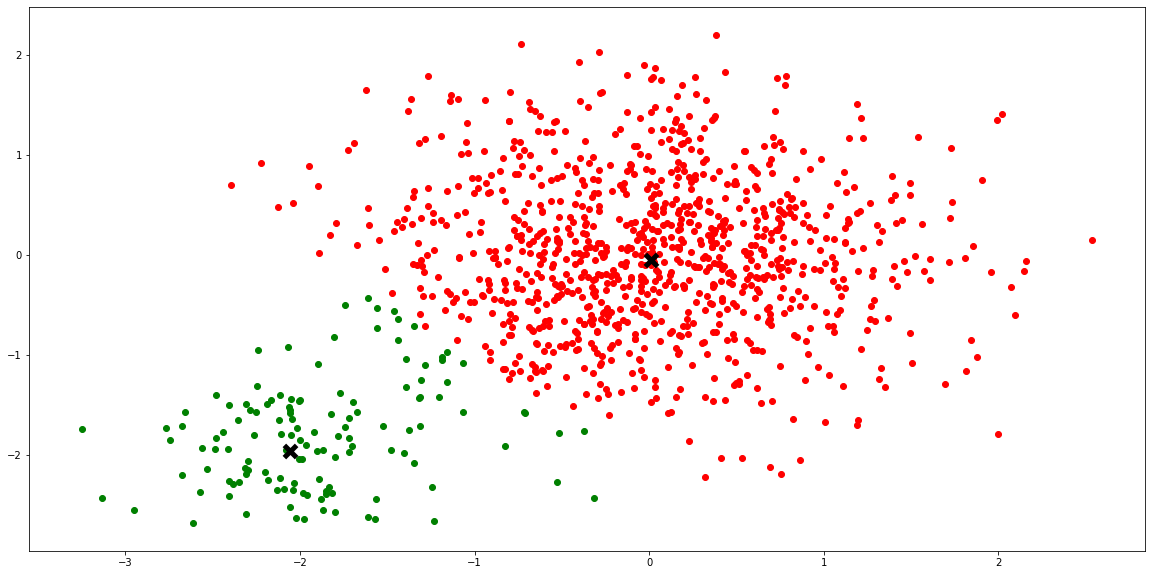

In [299]:
showMeanShifta(0.85, True, X, y)

### _для варіанту "б"_

In [365]:
def showMeanShiftb(bw, bs, data, target):
    msb = MeanShift(bandwidth=bw, bin_seeding = bs).fit(data)
    labelsb = msb.labels_
    cluster_centersb = msb.cluster_centers_
    labels_uniqueb = np.unique(labelsb)
    n_clusters_b = len(labels_uniqueb)
    lbs = labelsb.reshape((1,150))[0]
    print("Estimated number of clusters, : %d" % n_clusters_b)    
    print("Adjusted Rand Index", adjusted_rand_score(target[0],lbs))
    print("Adjusted Mutual Information", adjusted_mutual_info_score(target[0], lbs, average_method='arithmetic'))
    if lbs.sum() != 0:
        print("Silhouette Coefficient", silhouette_score(data,lbs))
    plt.figure(figsize = (20,40))
    c = 1
    n = int(np.exp(2/bw))
    colors = ['r','g','b','c','k','y','m']*n
    for i in range(1,5):
        for j in range(1,5):
            if i != j and j>i:
                plt.subplot(5,2,c)
                c+=1
                A = np.stack((data[i-1],data[j-1])).T
                #print(A)
                for k in range(len(A[:,0])):
                    plt.scatter(A[k,0],A[k,1], c = colors[labelsb[k]], marker = 'o')
                cl1 = cluster_centersb[:,i - 1]
                cl2 = cluster_centersb[:,j - 1]
                plt.scatter(cl1, cl2, marker = 'x', color = 'k', s = 150,
                           linewidth = 5, zorder = 10)

    plt.show()

Можем побачити, що модель виділила 3 класи

Estimated number of clusters, : 3
Adjusted Rand Index 0.7436826319432357
Adjusted Mutual Information 0.763083127524581
Silhouette Coefficient 0.5511573791952854


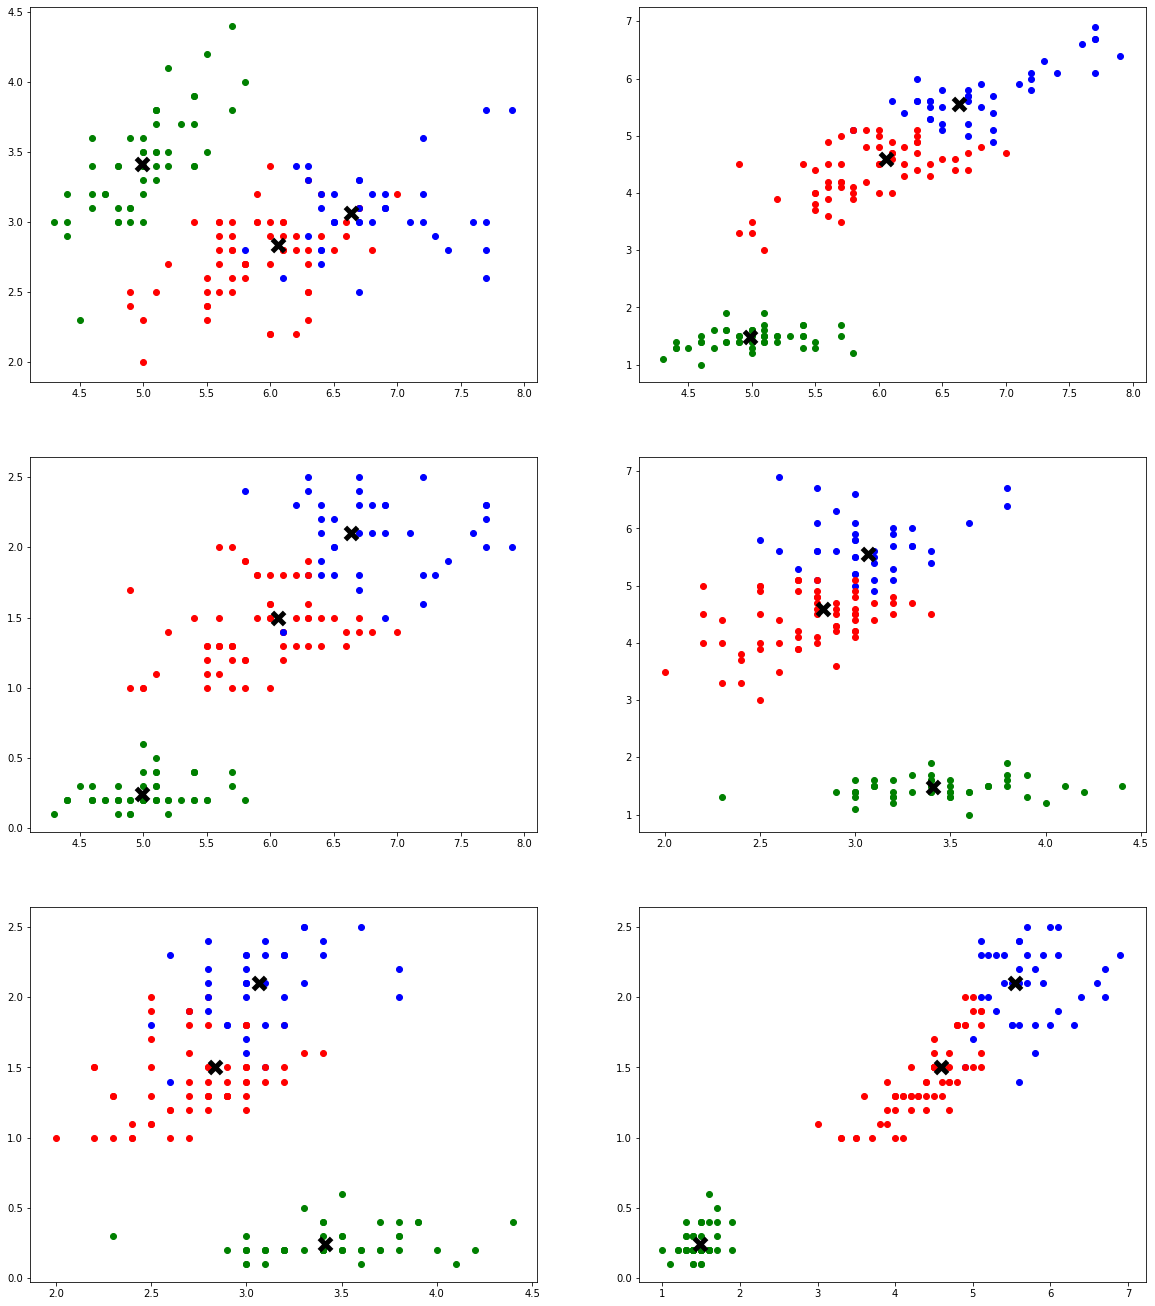

In [366]:
showMeanShiftb(0.85, True, data, target)

# Зміна параметрів основної моделі
У моделі MeanShift є такі параметри:
 - bandwidth: це масштаб відстані / розміру функції ядра, тобто, який розмір "вікна" по якому ми відносимо приклади до одного класу.
 - seeds використовується для ініціалізації ядер
 - bin_seeding якщо True, початкові місця ядра - це не всі точки
 - min_bin_freq щоб пришвидшити алгоритм, прийнмати в якості seed лише точки з min_bin_freq
 - cluster_all якщо True, то всі точки відносять до певного класу, навіть ті, що аглоритм не кластеризував
 - n_jobs кількість "робочих місць"(?), що будуть використані для обчислень
 - max_iter - максимальна кільікість ітерацій


Для перевірки із новими параметрами будуть використані _bandwidth_ та _bin-seeding_
### _варіант "а"_

bandwidth =  0.25  bin_seeding =  True
Estimated number of clusters, : 88
Adjusted Rand Index 0.008252091564529706
Adjusted Mutual Information 0.11894139351252825
Silhouette Coefficient 0.31363474071536096


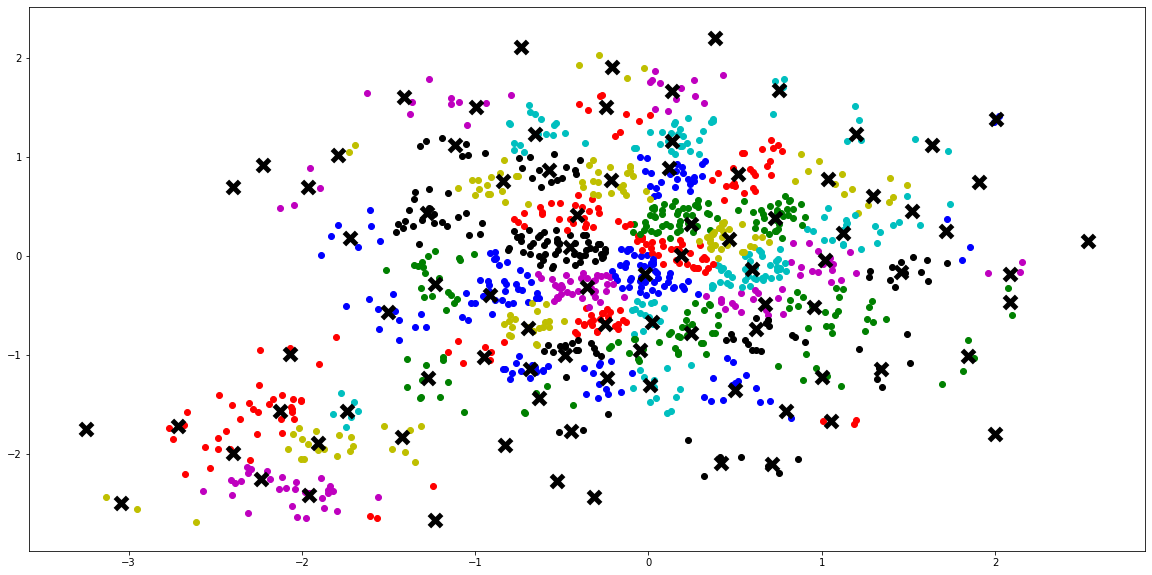

bandwidth =  0.25  bin_seeding =  False
Estimated number of clusters, : 93
Adjusted Rand Index 0.007468617824375201
Adjusted Mutual Information 0.11672458824577887
Silhouette Coefficient 0.29151354634087395


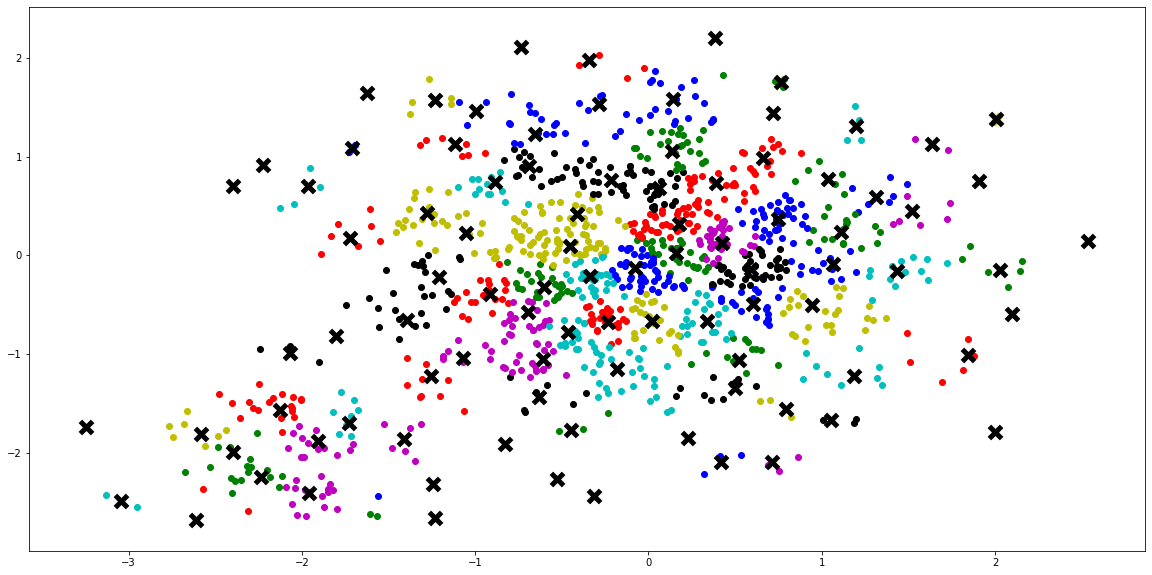

bandwidth =  0.85  bin_seeding =  True
Estimated number of clusters, : 2
Adjusted Rand Index 0.8310297182949096
Adjusted Mutual Information 0.72666400078184
Silhouette Coefficient 0.5039452828698582


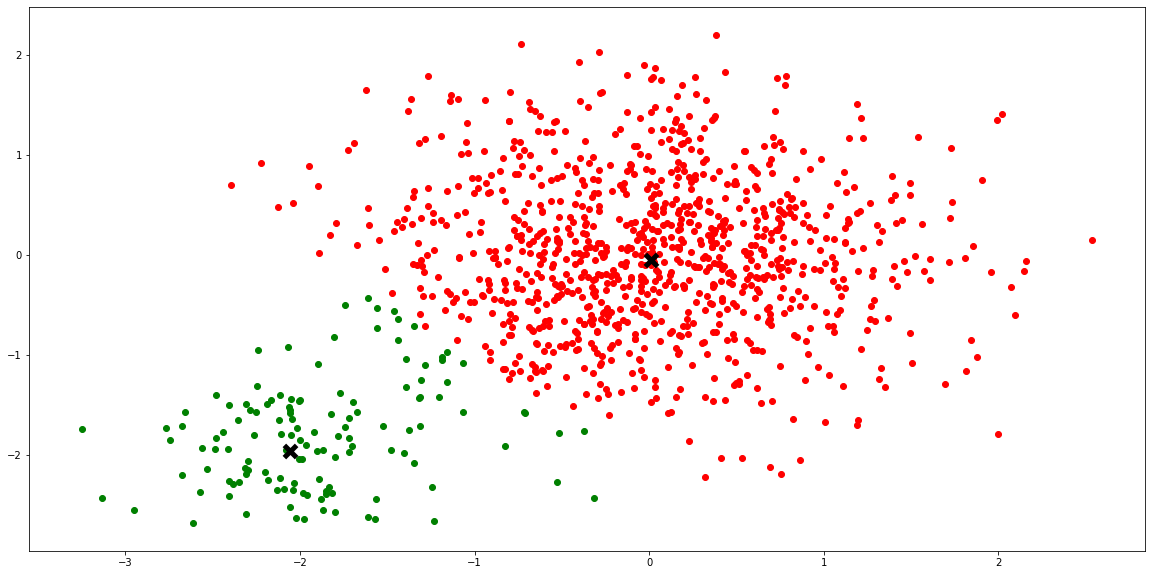

bandwidth =  0.85  bin_seeding =  False
Estimated number of clusters, : 2
Adjusted Rand Index 0.8310297182949096
Adjusted Mutual Information 0.72666400078184
Silhouette Coefficient 0.5039452828698582


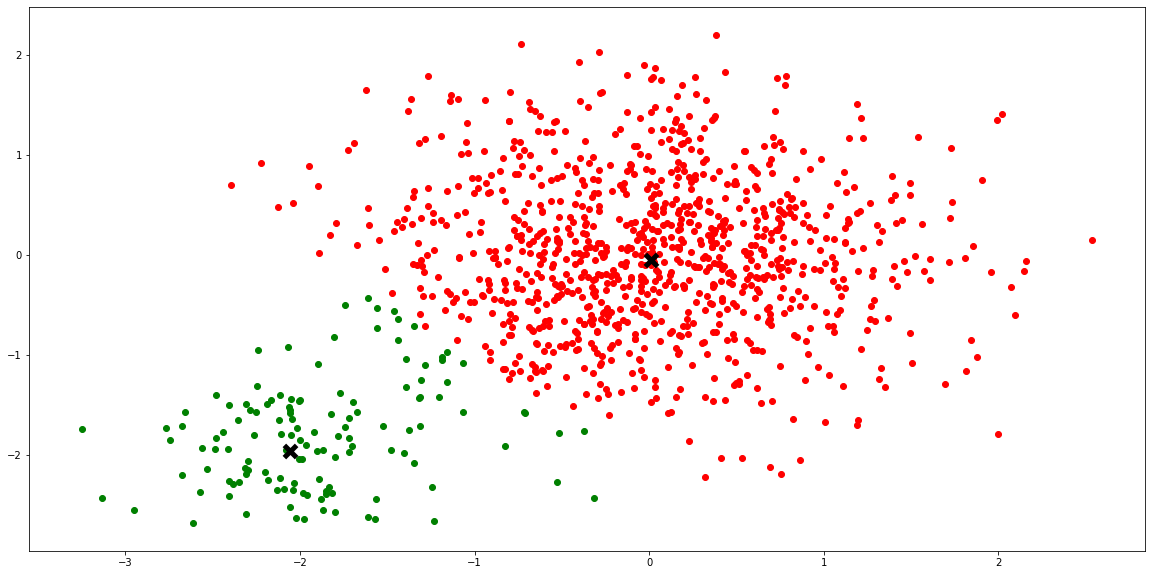

bandwidth =  1.25  bin_seeding =  True
Estimated number of clusters, : 2
Adjusted Rand Index 0.7581433887535972
Adjusted Mutual Information 0.6464083031311156
Silhouette Coefficient 0.4889663225672309


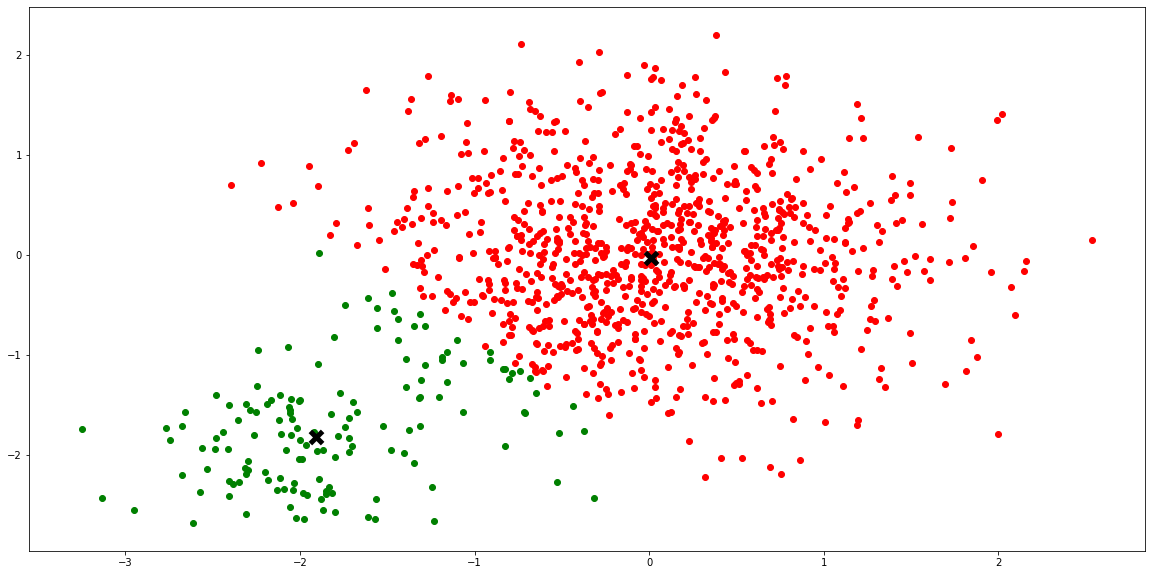

bandwidth =  1.25  bin_seeding =  False
Estimated number of clusters, : 2
Adjusted Rand Index 0.7627444846539687
Adjusted Mutual Information 0.6511682852216126
Silhouette Coefficient 0.4899791171157288


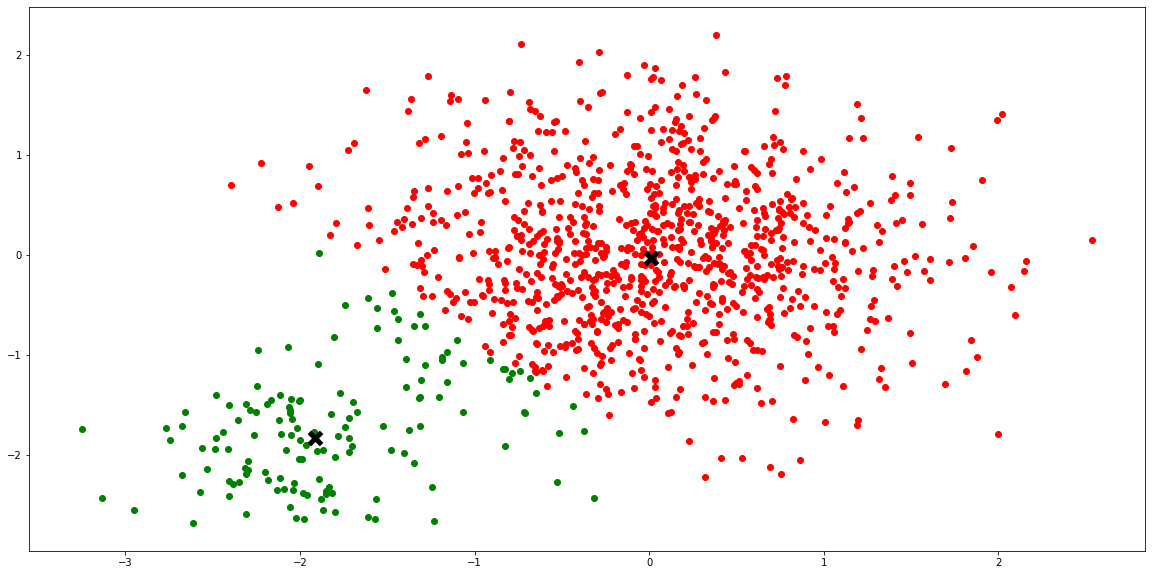

bandwidth =  2  bin_seeding =  True
Estimated number of clusters, : 1
Adjusted Rand Index 0.0
Adjusted Mutual Information -4.7377508593740325e-15


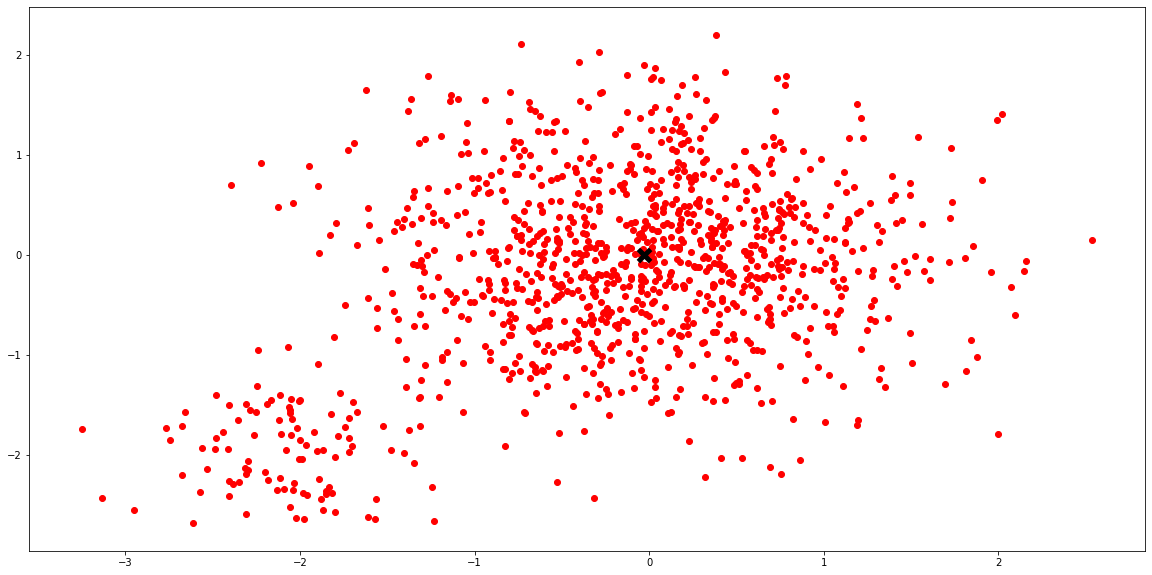

bandwidth =  2  bin_seeding =  False
Estimated number of clusters, : 1
Adjusted Rand Index 0.0
Adjusted Mutual Information -4.7377508593740325e-15


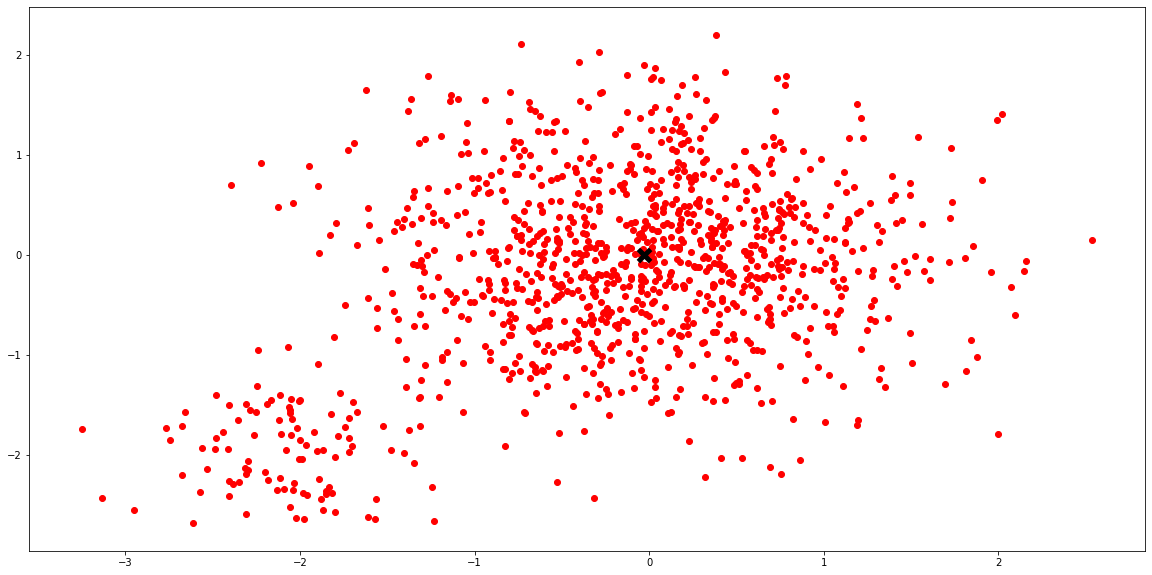

In [230]:
for bw in [0.25,0.85,1.25,2]:
    for bs in [True,False]:
        print('bandwidth = ', bw, ' bin_seeding = ', bs)
        showMeanShifta(bw,bs, X, y)

### _варіант "б"_

bandwidth =  0.25  bin_seeding =  True
Estimated number of clusters, : 80
Adjusted Rand Index 0.056327435379804454
Adjusted Mutual Information 0.23444094377032026
Silhouette Coefficient 0.22088274804444913


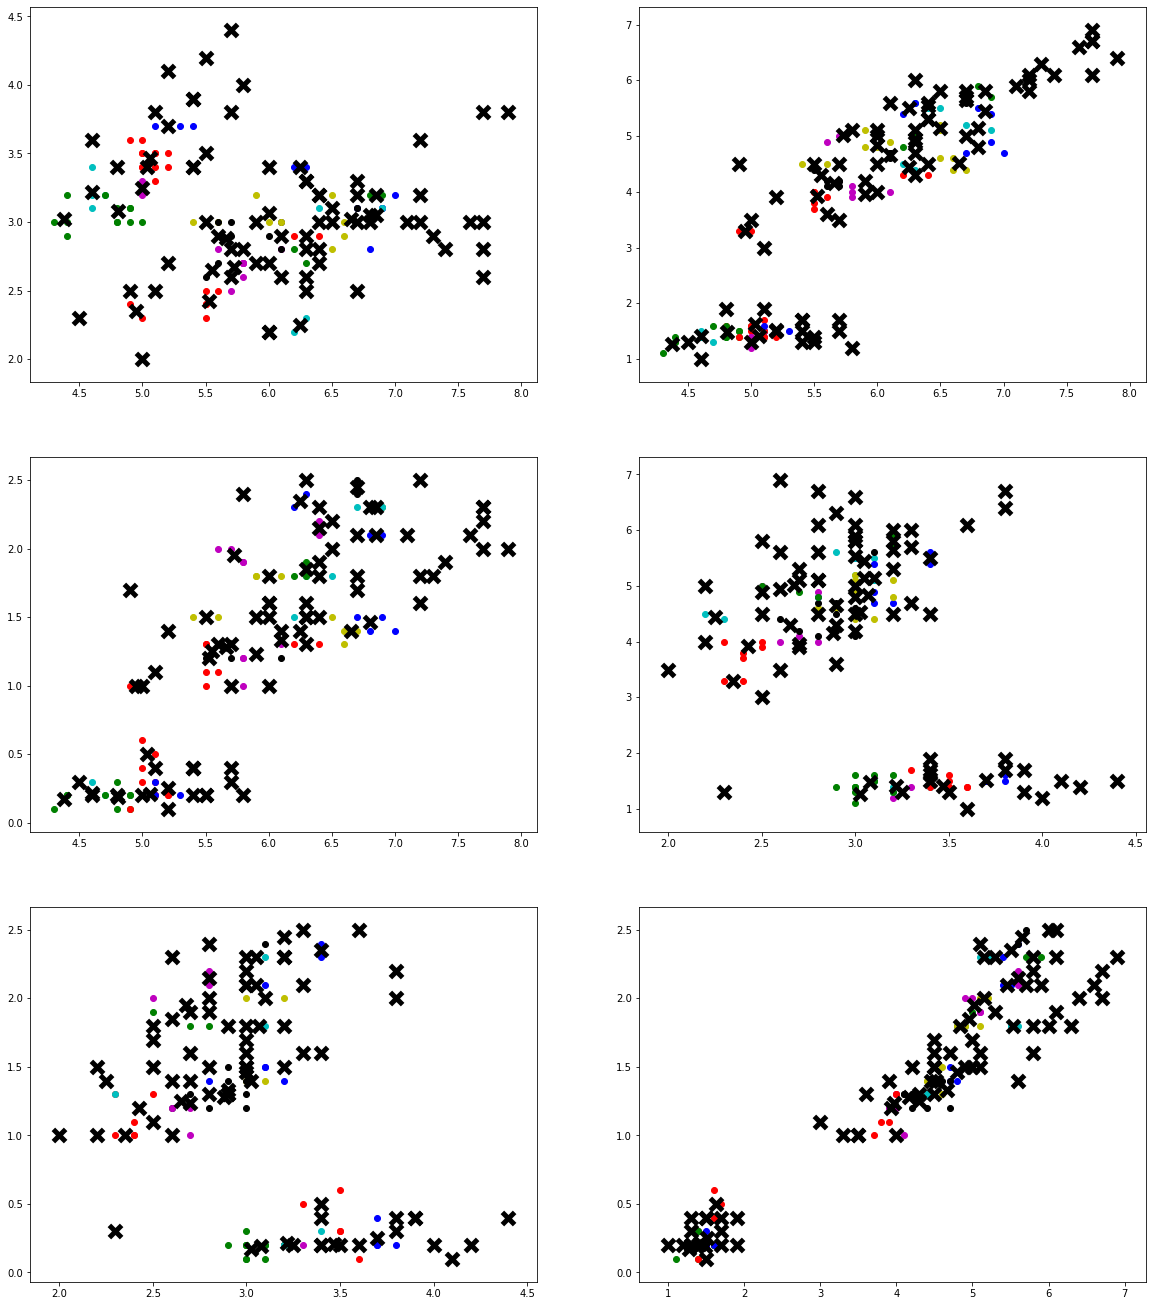

bandwidth =  0.25  bin_seeding =  False
Estimated number of clusters, : 87
Adjusted Rand Index 0.05703666925711655
Adjusted Mutual Information 0.21325032862841692
Silhouette Coefficient 0.198538711110532


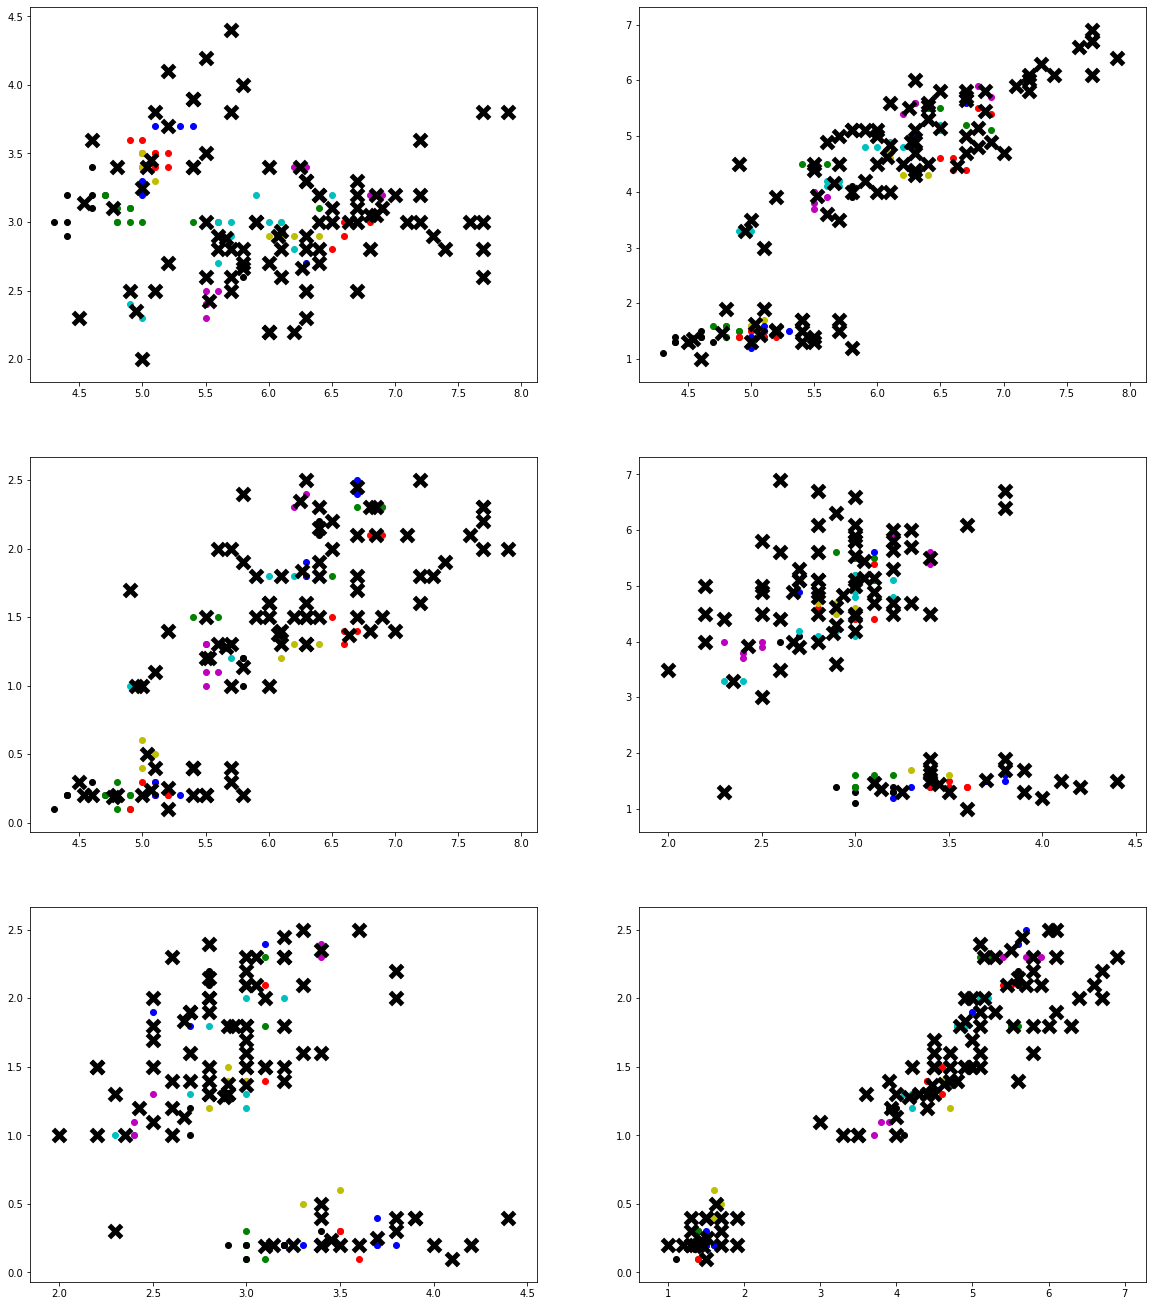

bandwidth =  0.85  bin_seeding =  True
Estimated number of clusters, : 3
Adjusted Rand Index 0.7436826319432357
Adjusted Mutual Information 0.763083127524581
Silhouette Coefficient 0.5511573791952854


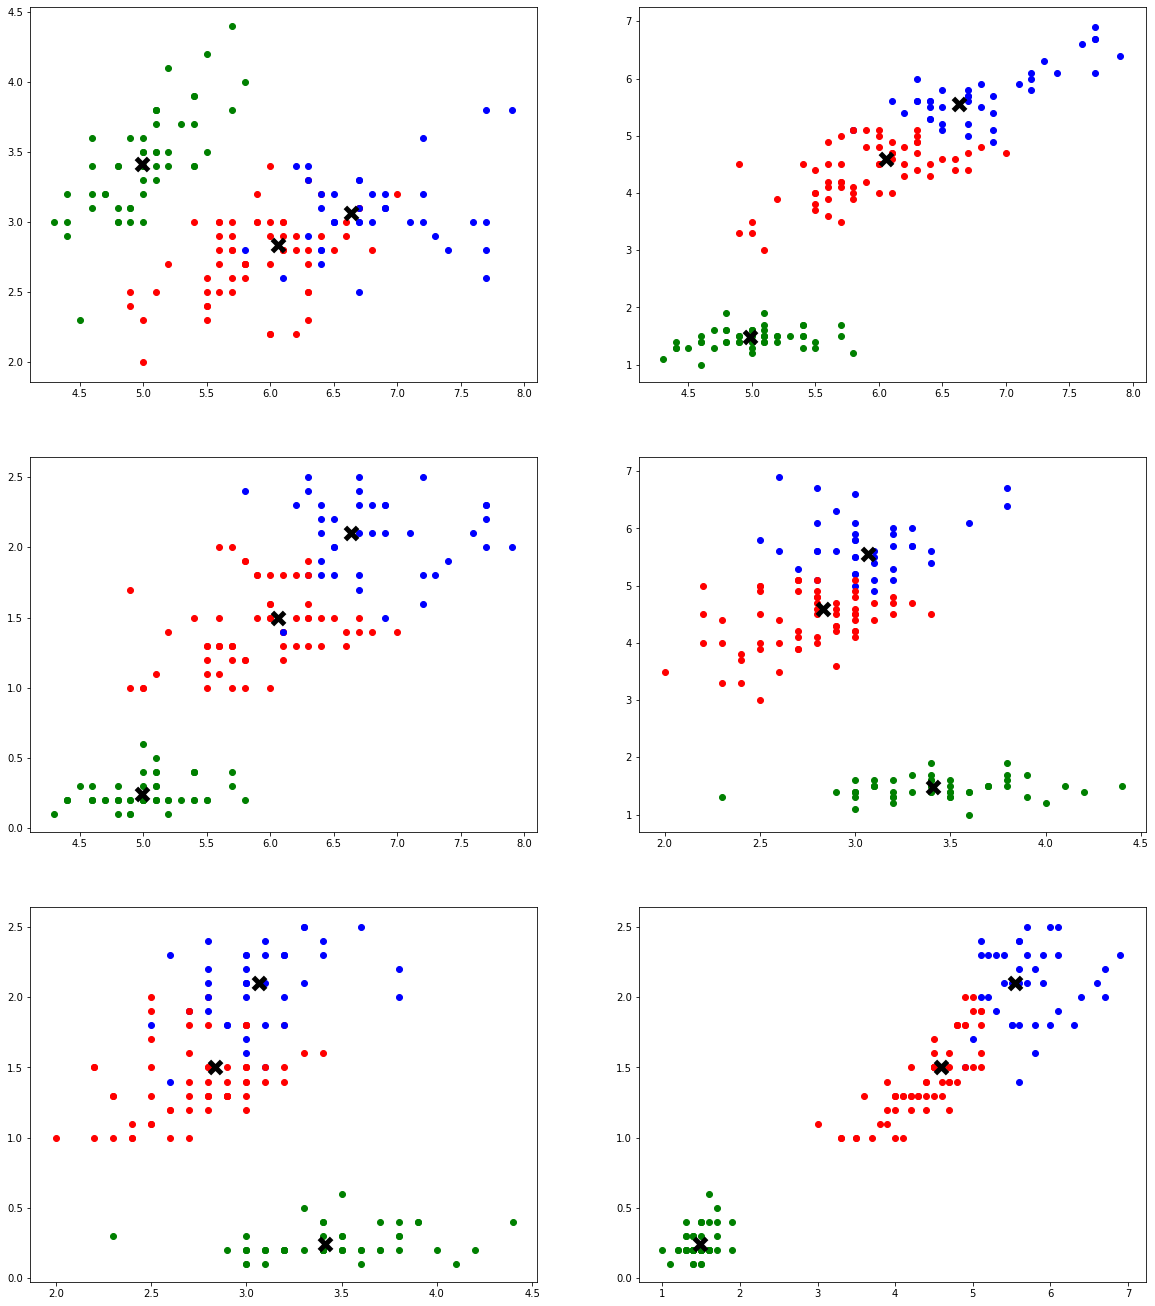

bandwidth =  0.85  bin_seeding =  False
Estimated number of clusters, : 3
Adjusted Rand Index 0.7436826319432357
Adjusted Mutual Information 0.763083127524581
Silhouette Coefficient 0.5511573791952854


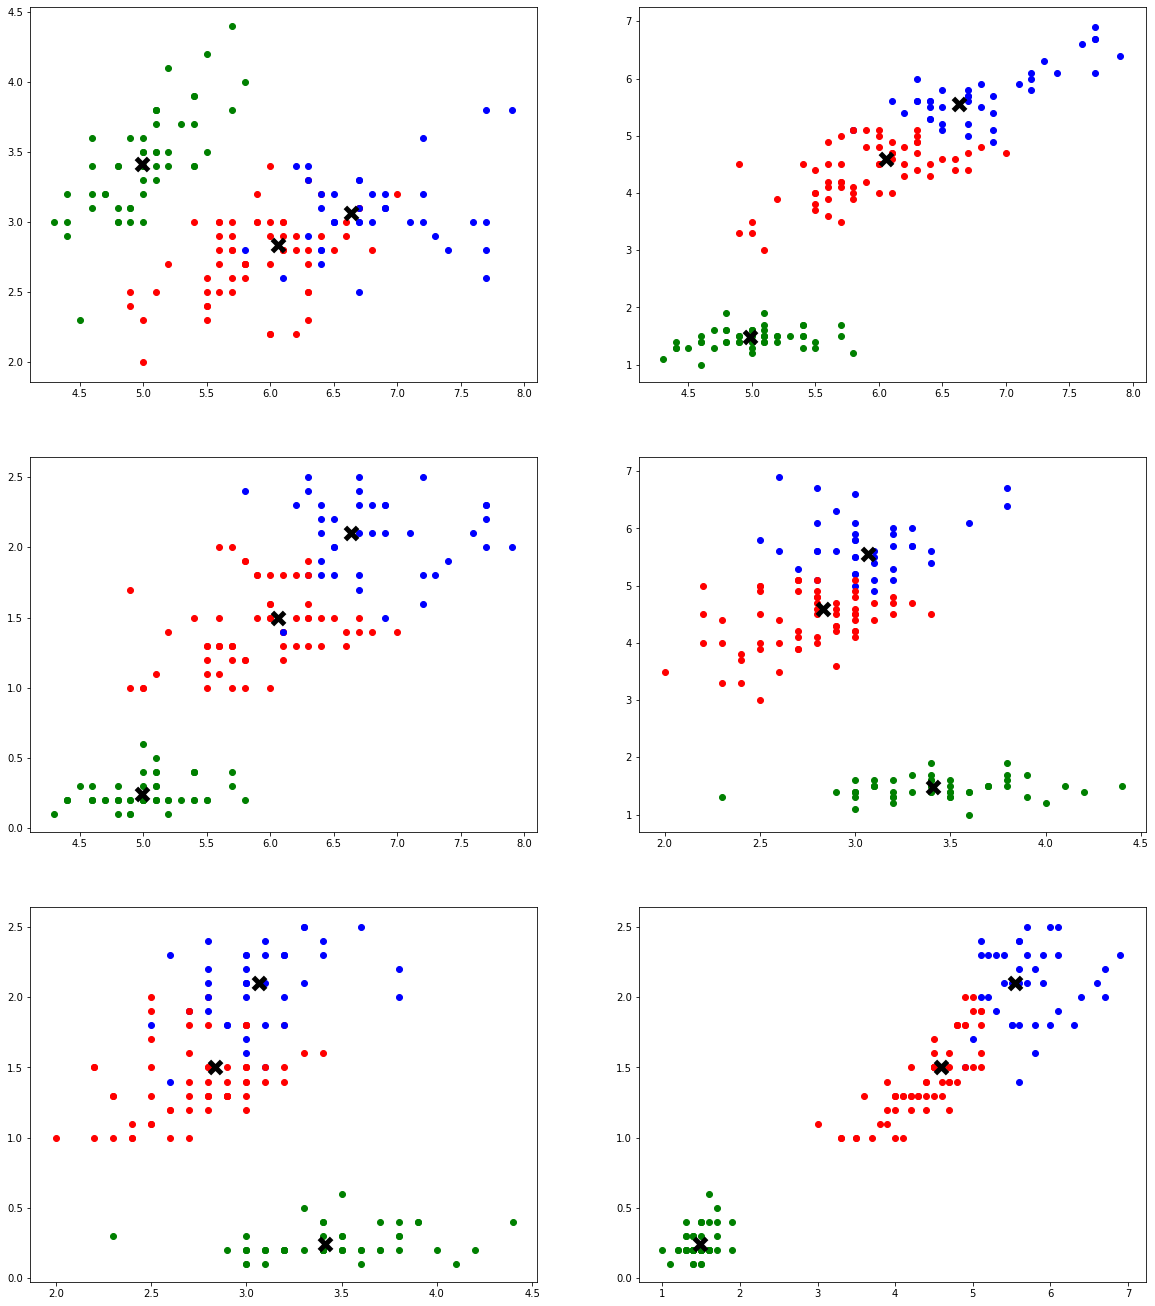

bandwidth =  1.25  bin_seeding =  True
Estimated number of clusters, : 2
Adjusted Rand Index 0.5583714437541352
Adjusted Mutual Information 0.6970423665937585
Silhouette Coefficient 0.685788171261719


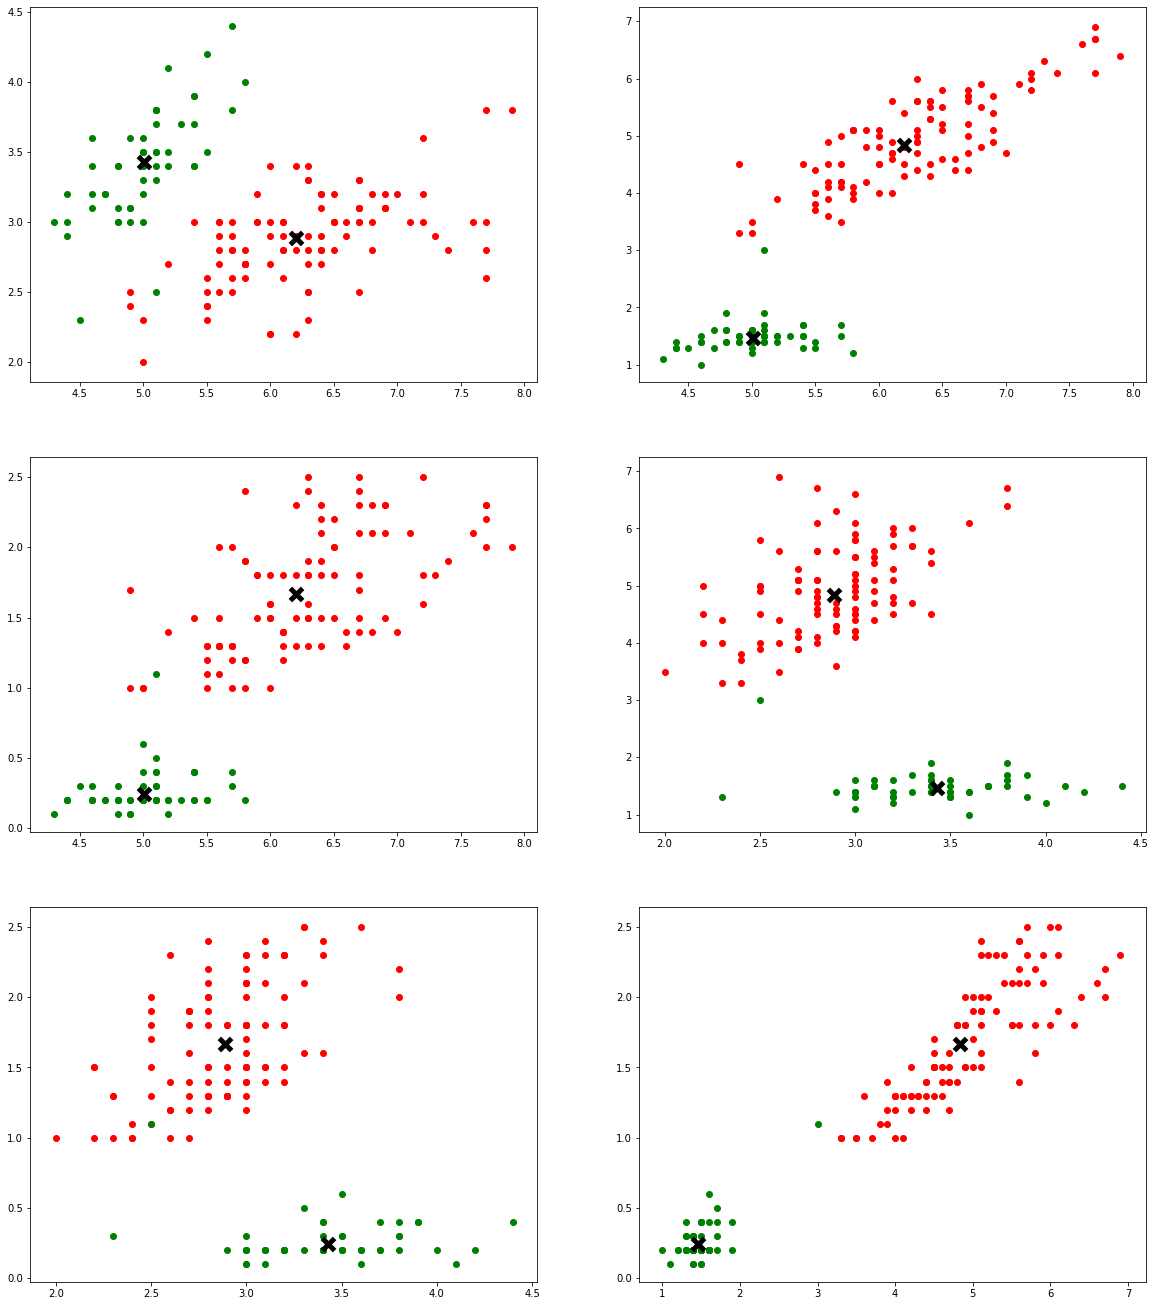

bandwidth =  1.25  bin_seeding =  False
Estimated number of clusters, : 2
Adjusted Rand Index 0.5583714437541352
Adjusted Mutual Information 0.6970423665937585
Silhouette Coefficient 0.685788171261719


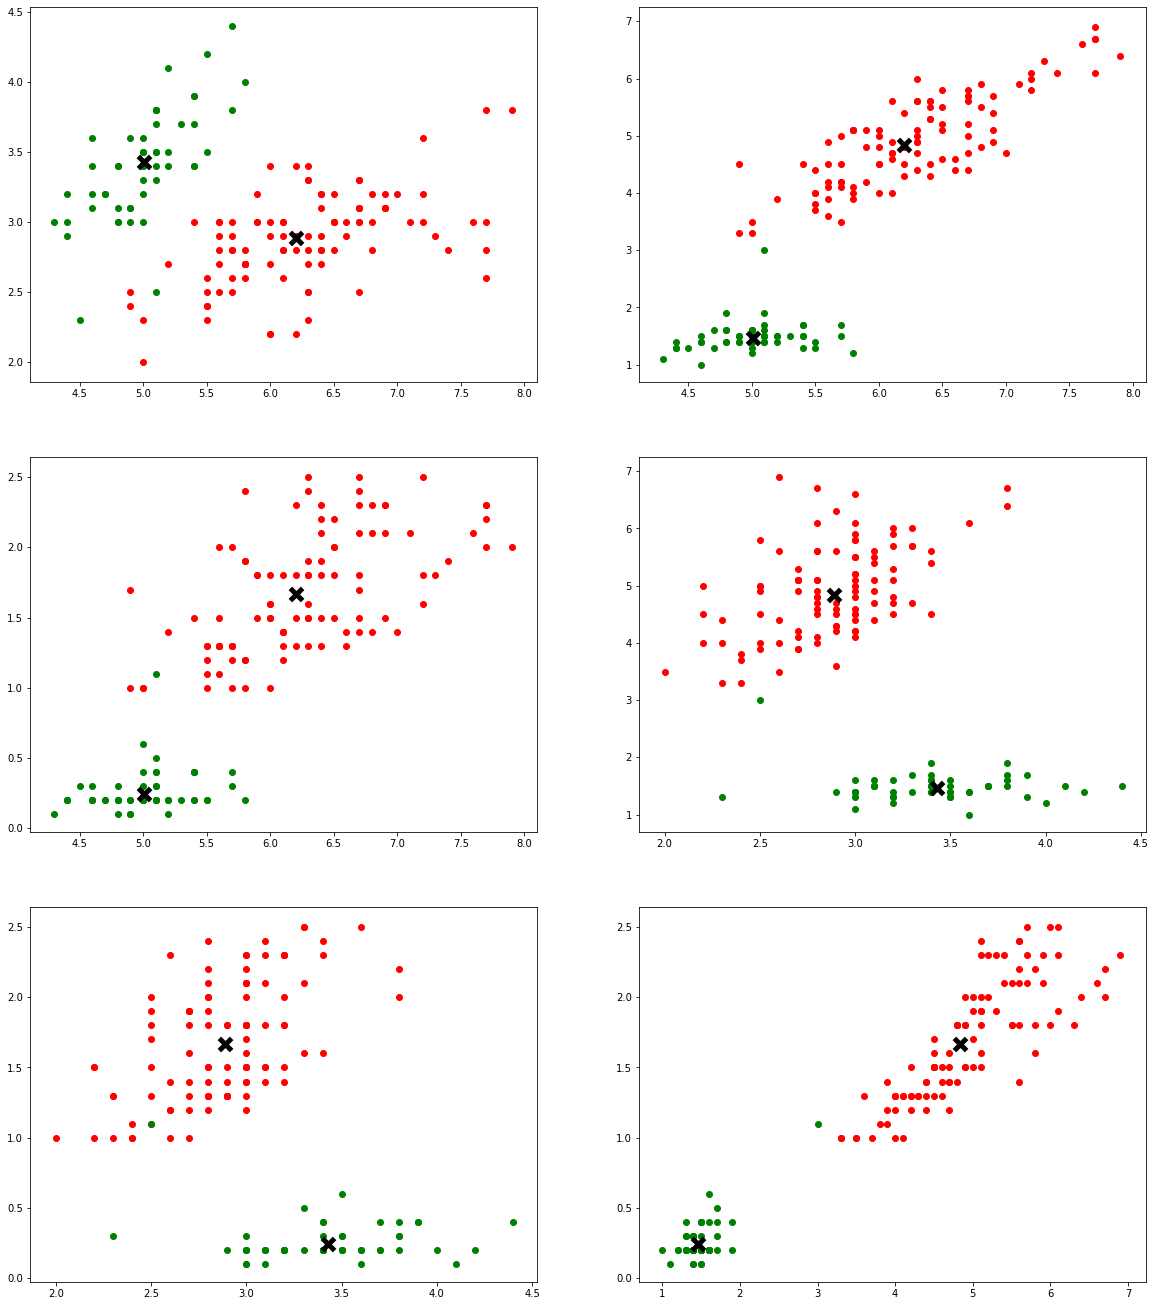

bandwidth =  2  bin_seeding =  True
Estimated number of clusters, : 2
Adjusted Rand Index 0.5489713200964548
Adjusted Mutual Information 0.6733664248122456
Silhouette Coefficient 0.683268865947887


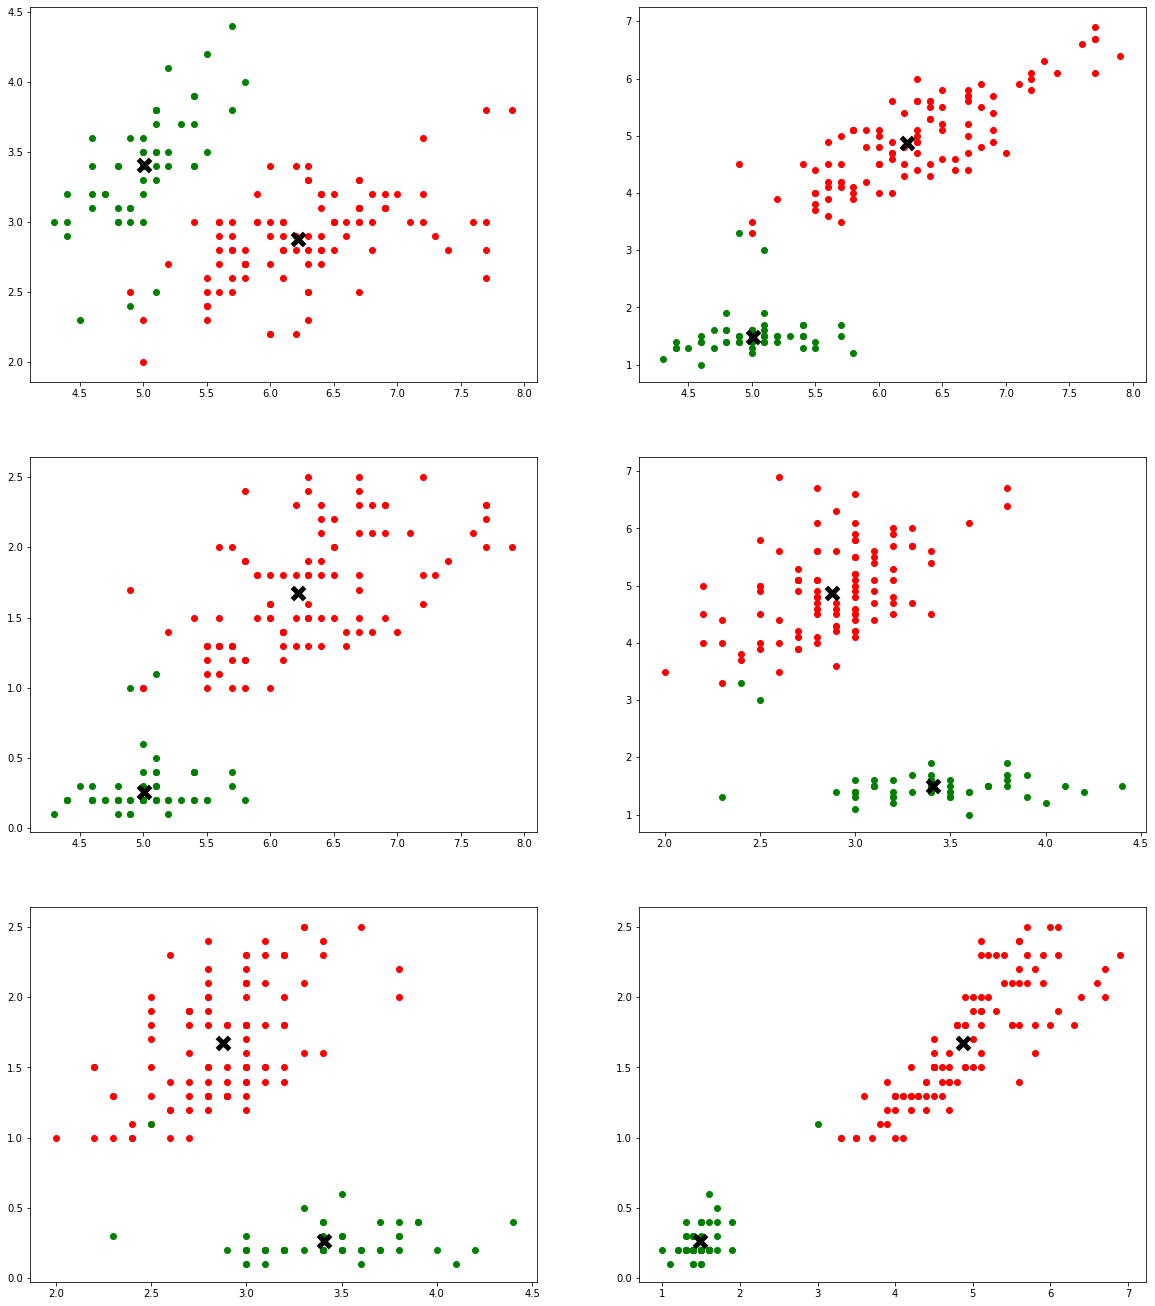

bandwidth =  2  bin_seeding =  False
Estimated number of clusters, : 2
Adjusted Rand Index 0.5489713200964548
Adjusted Mutual Information 0.6733664248122456
Silhouette Coefficient 0.683268865947887


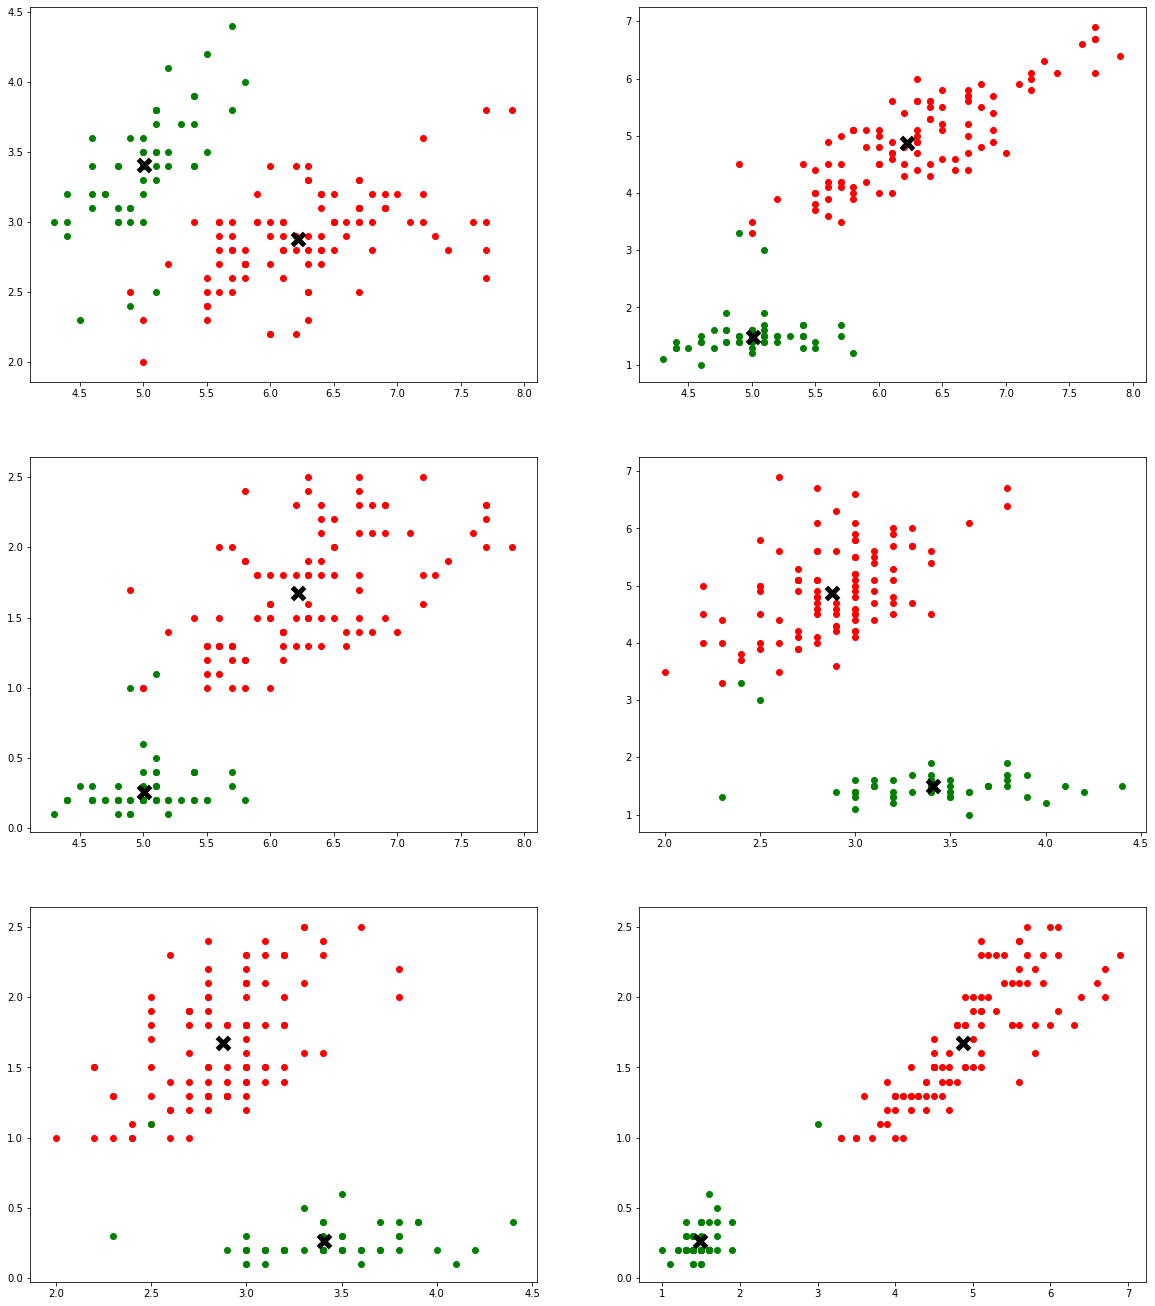

In [222]:
for bw in [0.25,0.85,1.25,2]:
    for bs in [True,False]:
        print('bandwidth = ', bw, ' bin_seeding = ', bs)
        showMeanShiftb(bw,bs,data,target)

# Зміна порядку об'єктів
_варіант "а"_

[[-0.61821751  0.70564528]
 [ 0.70351195  0.50833962]
 [ 0.4912635   0.73776534]
 ...
 [ 0.43464951  0.35123437]
 [-0.6861621   0.10836373]
 [ 0.95042383  0.25355409]]
Estimated number of clusters, : 2
Adjusted Rand Index 0.8310297182949096
Adjusted Mutual Information 0.72666400078184
Silhouette Coefficient 0.5039452828698582


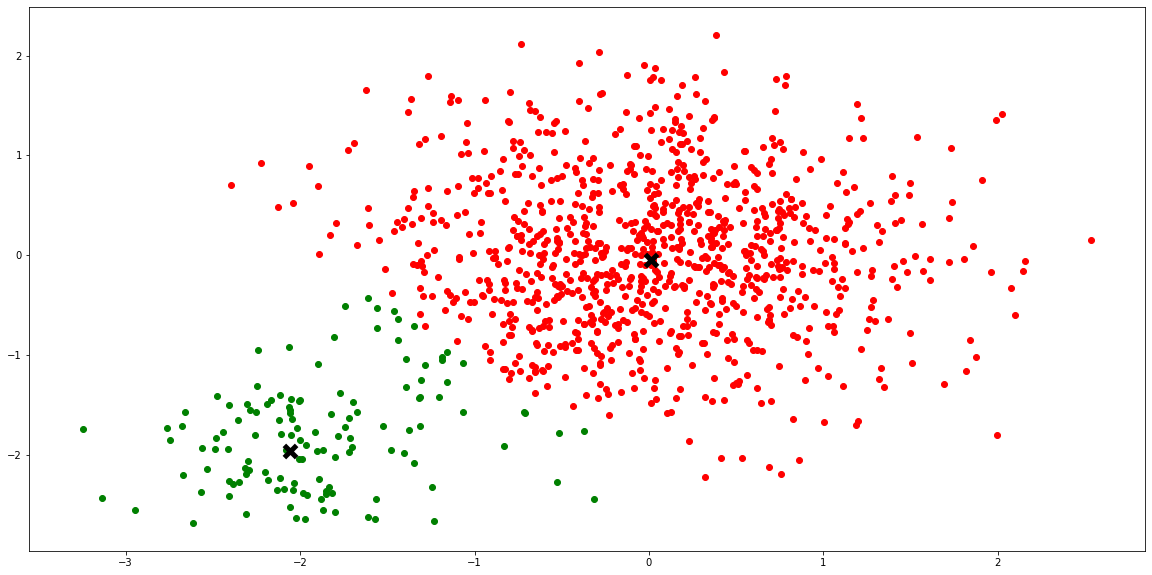

In [352]:
yr = y.reshape((1100,1))
B = np.concatenate((X,yr),axis = 1)
np.random.shuffle(B)
X_ro = np.stack((B[:,0],B[:,1])).T
y_ro = B[:,2]
print(X_ro)
showMeanShifta(0.85, True, X_ro,y_ro)

Estimated number of clusters, : 3
Adjusted Rand Index 0.7436826319432357
Adjusted Mutual Information 0.763083127524581
Silhouette Coefficient 0.5511573791952864


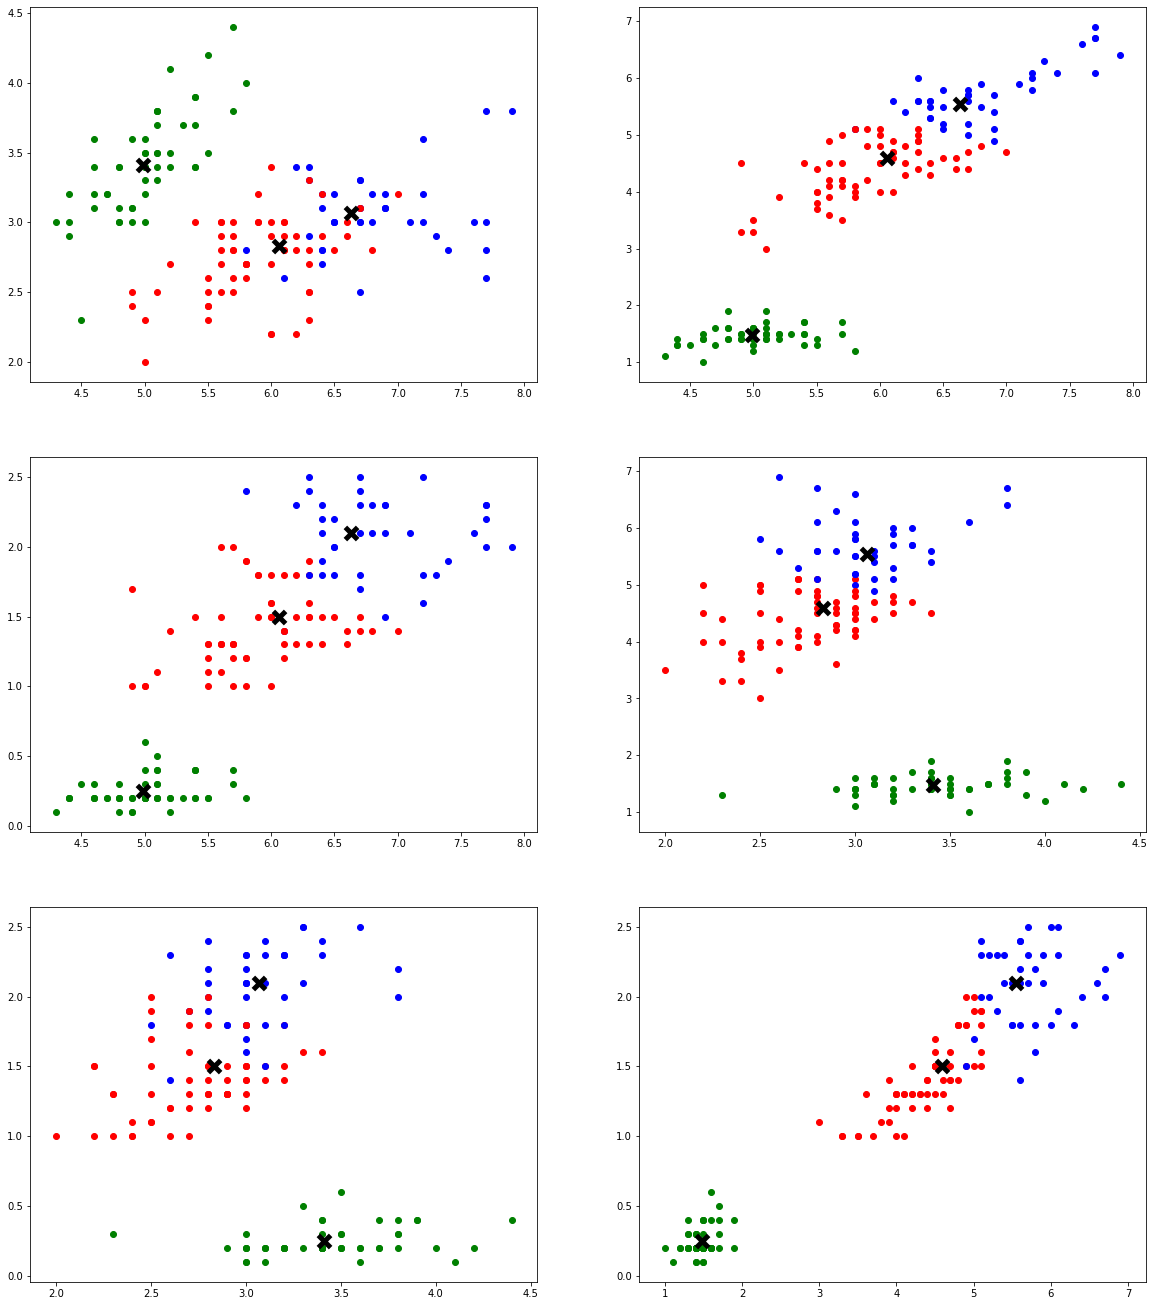

In [376]:
Bb = np.concatenate((data,target.T),axis = 1)
np.random.shuffle(Bb)
data_ro = pd.DataFrame(np.stack((Bb[:,0],Bb[:,1],Bb[:,2],Bb[:,3])).T)
target_ro = ((Bb[:,4]).reshape(1,150)).astype(int)

showMeanShiftb(0.85, True, data_ro,target_ro)

# Висновок 
- Можна побачити, що із збільшенням чи зменшенням пропускної здатності, модель "бачить" менше чи більше классів відповідно. 
- При bin_seeding = True результати, як правило, кращі. Певно, дані дещо зашумлені
- Відповідно до метрик, обидві моделі показали найкращі результати при пропускній здатності 0.85
- При пропускній здатності в кілька резів меншій чи більшій ніж 0.85, модель була неадекватною з точки зори метрик: вони показали, що моделі з такими пропускними здатностями є досить випадковими та мало точок кластеризується правильно
- При зміні bin_seeding з True на False чи навпаки іноді виникають незначні зміни, якщо вірити метрикам
- Також для моделей, які "підбивали" всі точки під один клас, не був підрахований Silhouette Coefficient, так як він може бути підрахований тільки для кількостей класів n, де n: 1 < n < кількість "точок"
- Зміна порядку елементів не впливає на результати